In [1]:
# Logistic Regression - Binary Classification True/False, Sale or No Sale

In [2]:
# Sigmoid Function theta (z) = 1 / [1+ (e ^-z)] - takes in any value and outputs
# it to between 0 and 1.  Or the probability of it belonging to 0 or 1 class

# p = 1 / [1 + (e ^ (b0 + b1x + b2x))]

In [3]:
# Confusion Matrix
# False Positive (Type 1 error) - Man is preganant
# False Negative (Type 2 error) - Preganant woman is not pregnant

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_csv('titanic_train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


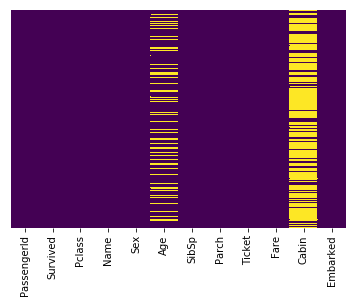

In [8]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
sns.set_style('whitegrid')  # just a nice style for charts

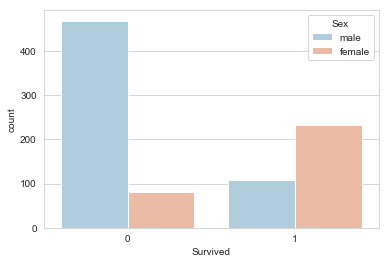

In [10]:
sns.countplot(x='Survived', hue='Sex', data = train, palette = 'RdBu_r')

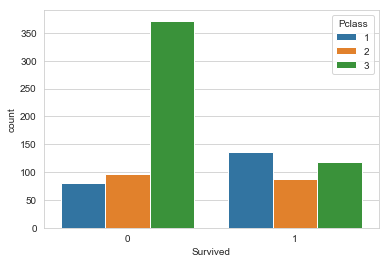

In [11]:
sns.countplot(x='Survived', hue='Pclass', data = train)

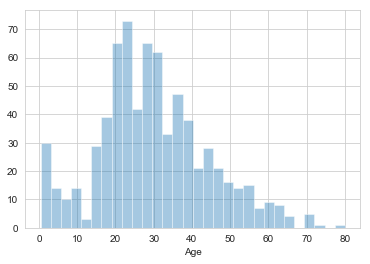

In [12]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

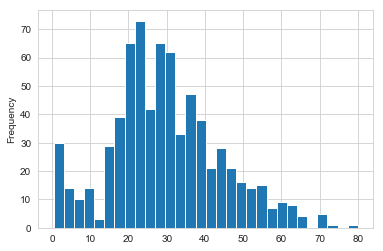

In [13]:
train['Age'].plot.hist(bins=30)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


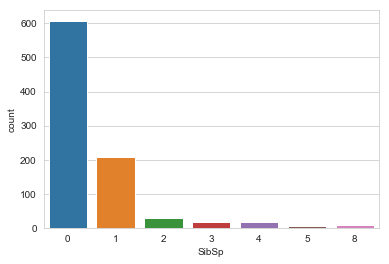

In [15]:
sns.countplot(x='SibSp', data=train)

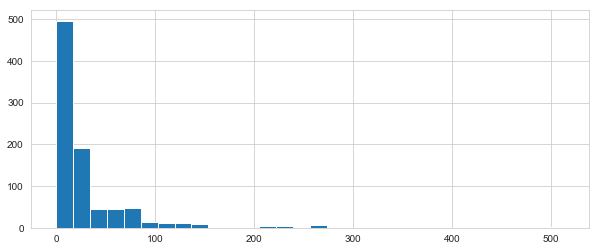

In [16]:
train['Fare'].hist(bins=30, figsize=(10,4))

# Cleaning data

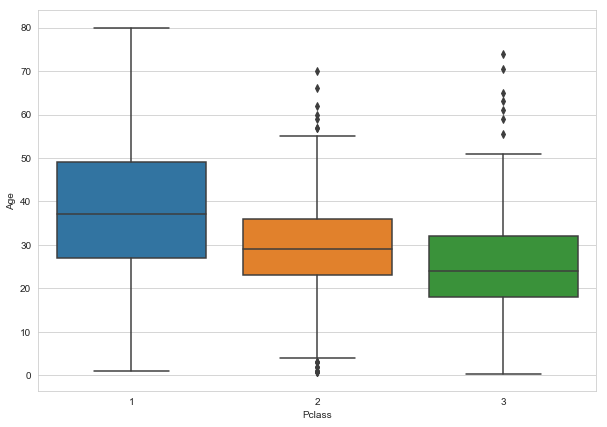

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y = 'Age', data = train)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

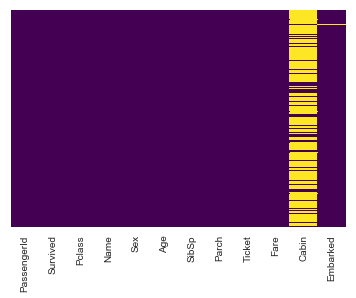

In [20]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [21]:
train.drop('Cabin', axis=1, inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True)

In [24]:
# Create dummy variables - one is a predictor of the other, which creates
# problems with multicoliniertiy

In [25]:
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [26]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [27]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [30]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
train = pd.concat([train,sex,embark],axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
train.drop('PassengerId',axis=1, inplace=True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Modeling

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [37]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [45]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(x_test)

In [51]:
# Confusion Matrix 
# from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [60]:
precision_score(y_test, predictions)

0.8192771084337349

In [62]:
accuracy_score(y_test, predictions)

0.8089887640449438

In [52]:
from sklearn.metrics import confusion_matrix

In [ ]:
##Top Left: True Negatives 

##Top Right False Negatives 

##Bottom Left: False Negatives 

##Bottom Right: True Positives 

In [53]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [ ]:
Accuracy = (148+36)/267
Sensitivy = (36+68)/15

In [55]:
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,1,0,1
613,3,24.0,0,0,7.7500,1,1,0
615,2,24.0,1,2,65.0000,0,0,1
337,1,41.0,0,0,134.5000,0,0,0
718,3,24.0,0,0,15.5000,1,1,0
152,3,55.5,0,0,8.0500,1,0,1
826,3,24.0,0,0,56.4958,1,0,1
418,2,30.0,0,0,13.0000,1,0,1
614,3,35.0,0,0,8.0500,1,0,1
241,3,24.0,1,0,15.5000,0,1,0
